<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,plot_roc_curve, roc_curve, recall_score, auc,f1_score

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df[['Glucose','BloodPressure','SkinThickness','BMI']] = df[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df.Glucose.fillna(df.Glucose.mean(), inplace = True)
df.BloodPressure.fillna(df.BloodPressure.mean(), inplace = True)
df.SkinThickness.fillna(df.SkinThickness.median(), inplace = True)
#df.Insulin.fillna(df.Insulin.median(), inplace = True)
df.BMI.fillna(df.BMI.median(), inplace = True)

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.500000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,-0.073535,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.331080,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,-0.046829,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.116547,0.543205,0.102188,0.126107,0.214873
Insulin,-0.073535,0.331080,-0.046829,0.116547,1.000000,0.184972,0.185071,-0.042163,0.130548
BMI,0.021559,0.231128,0.281199,0.543205,0.184972,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.185071,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,-0.042163,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.130548,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

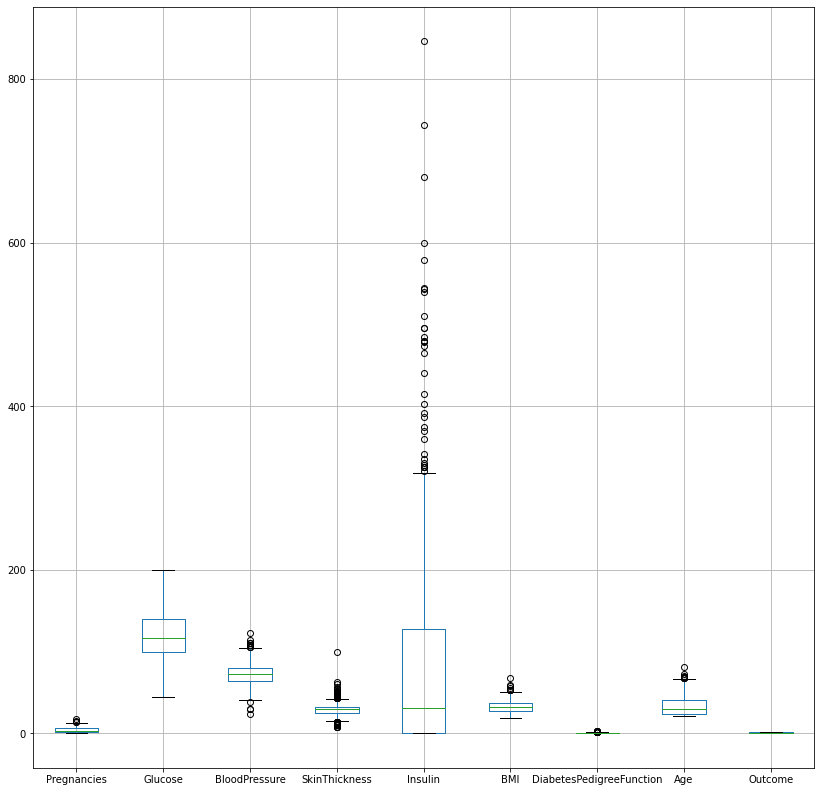

In [11]:
df.boxplot(figsize=(14,14))

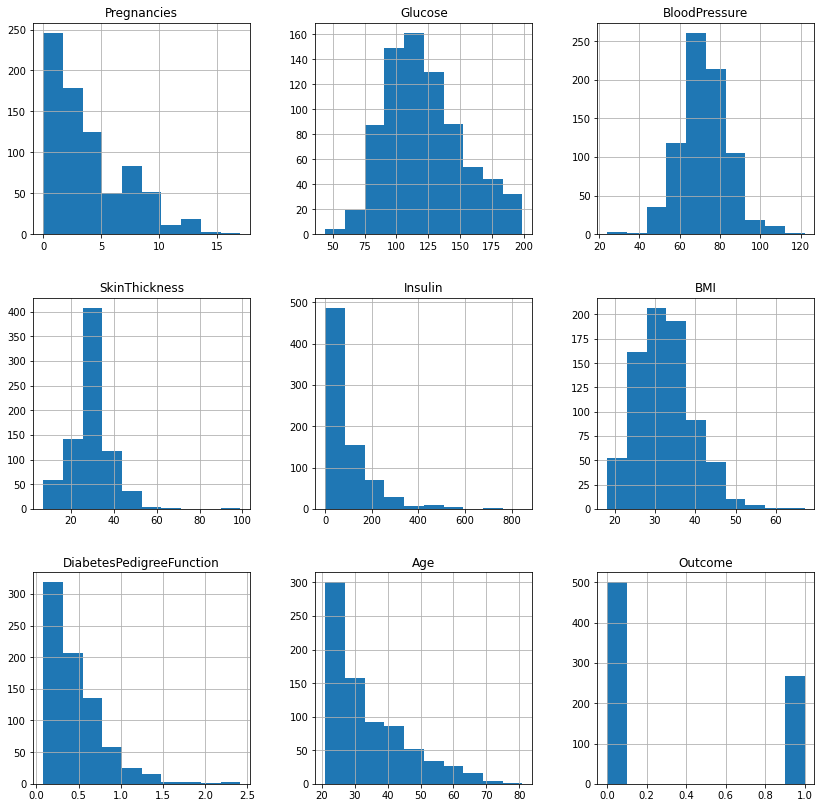

In [12]:
df.hist(figsize=(14,14))
plt.show()

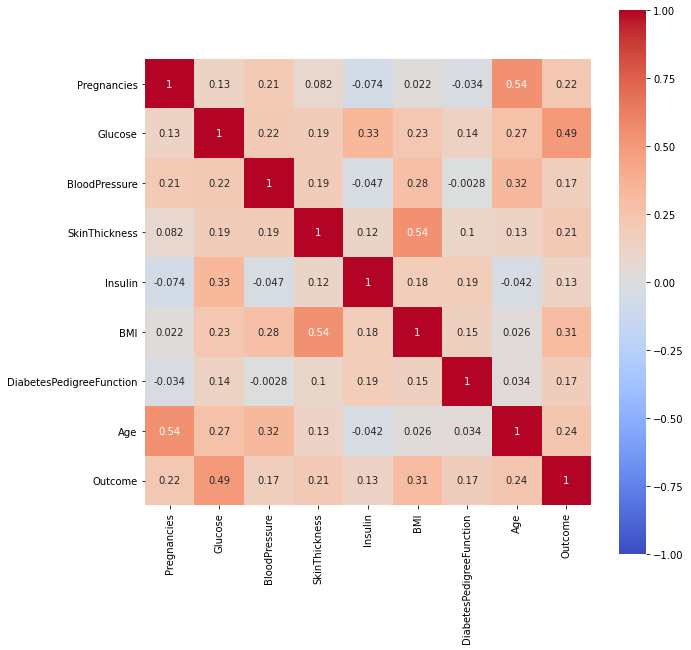

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

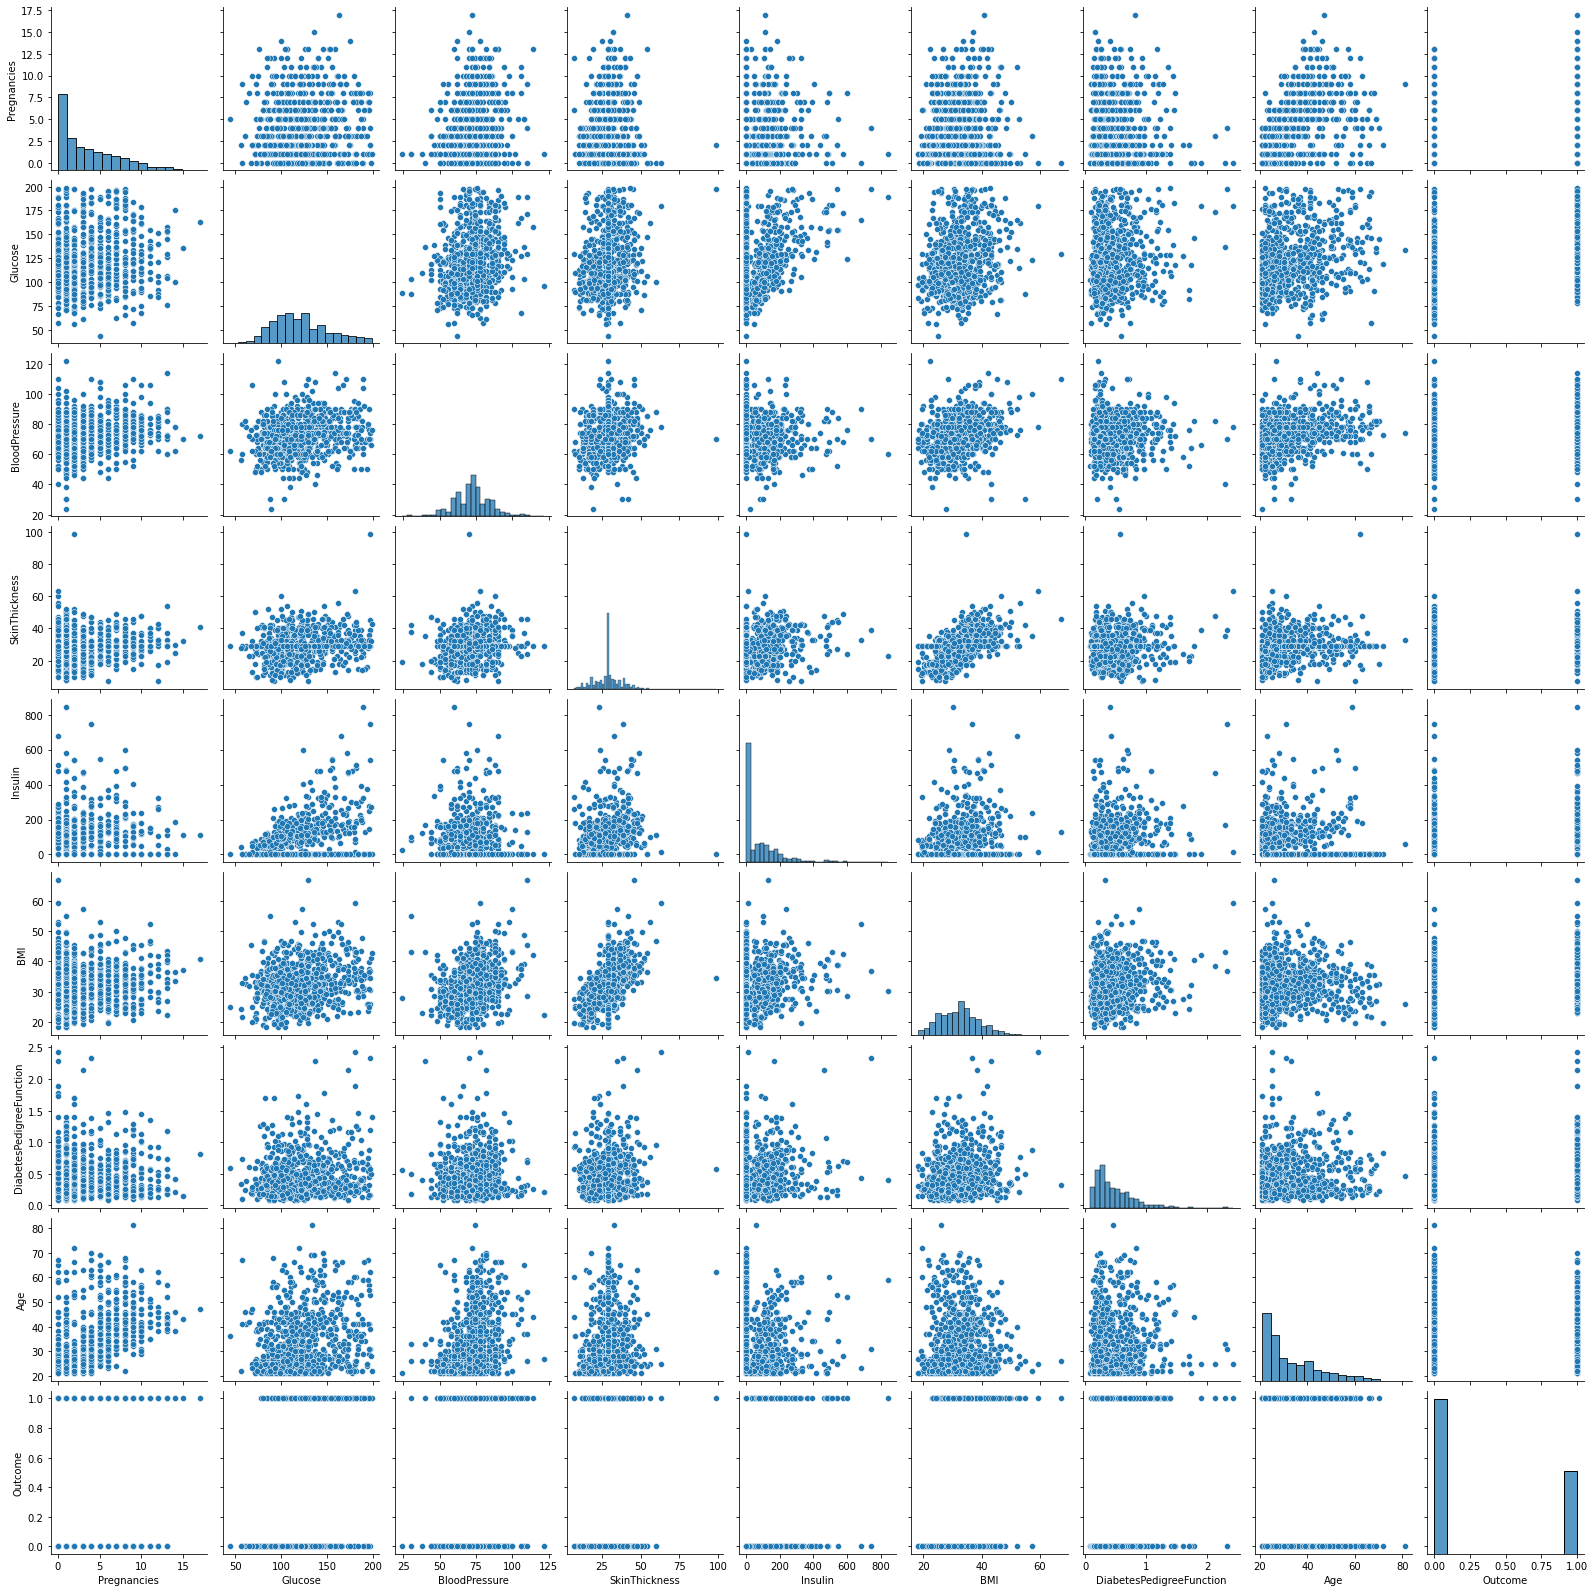

In [14]:
sns.pairplot(df, diag_kind="hist")

array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

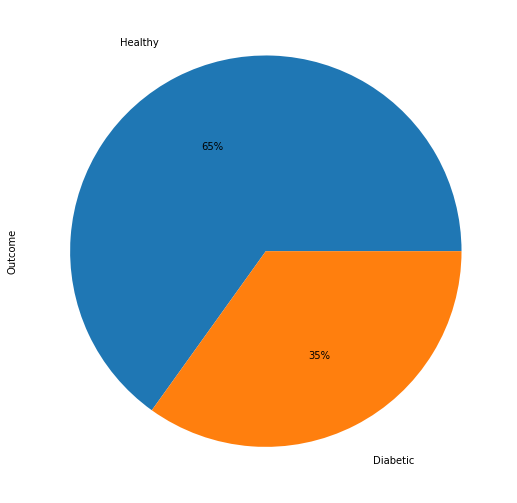

In [15]:
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

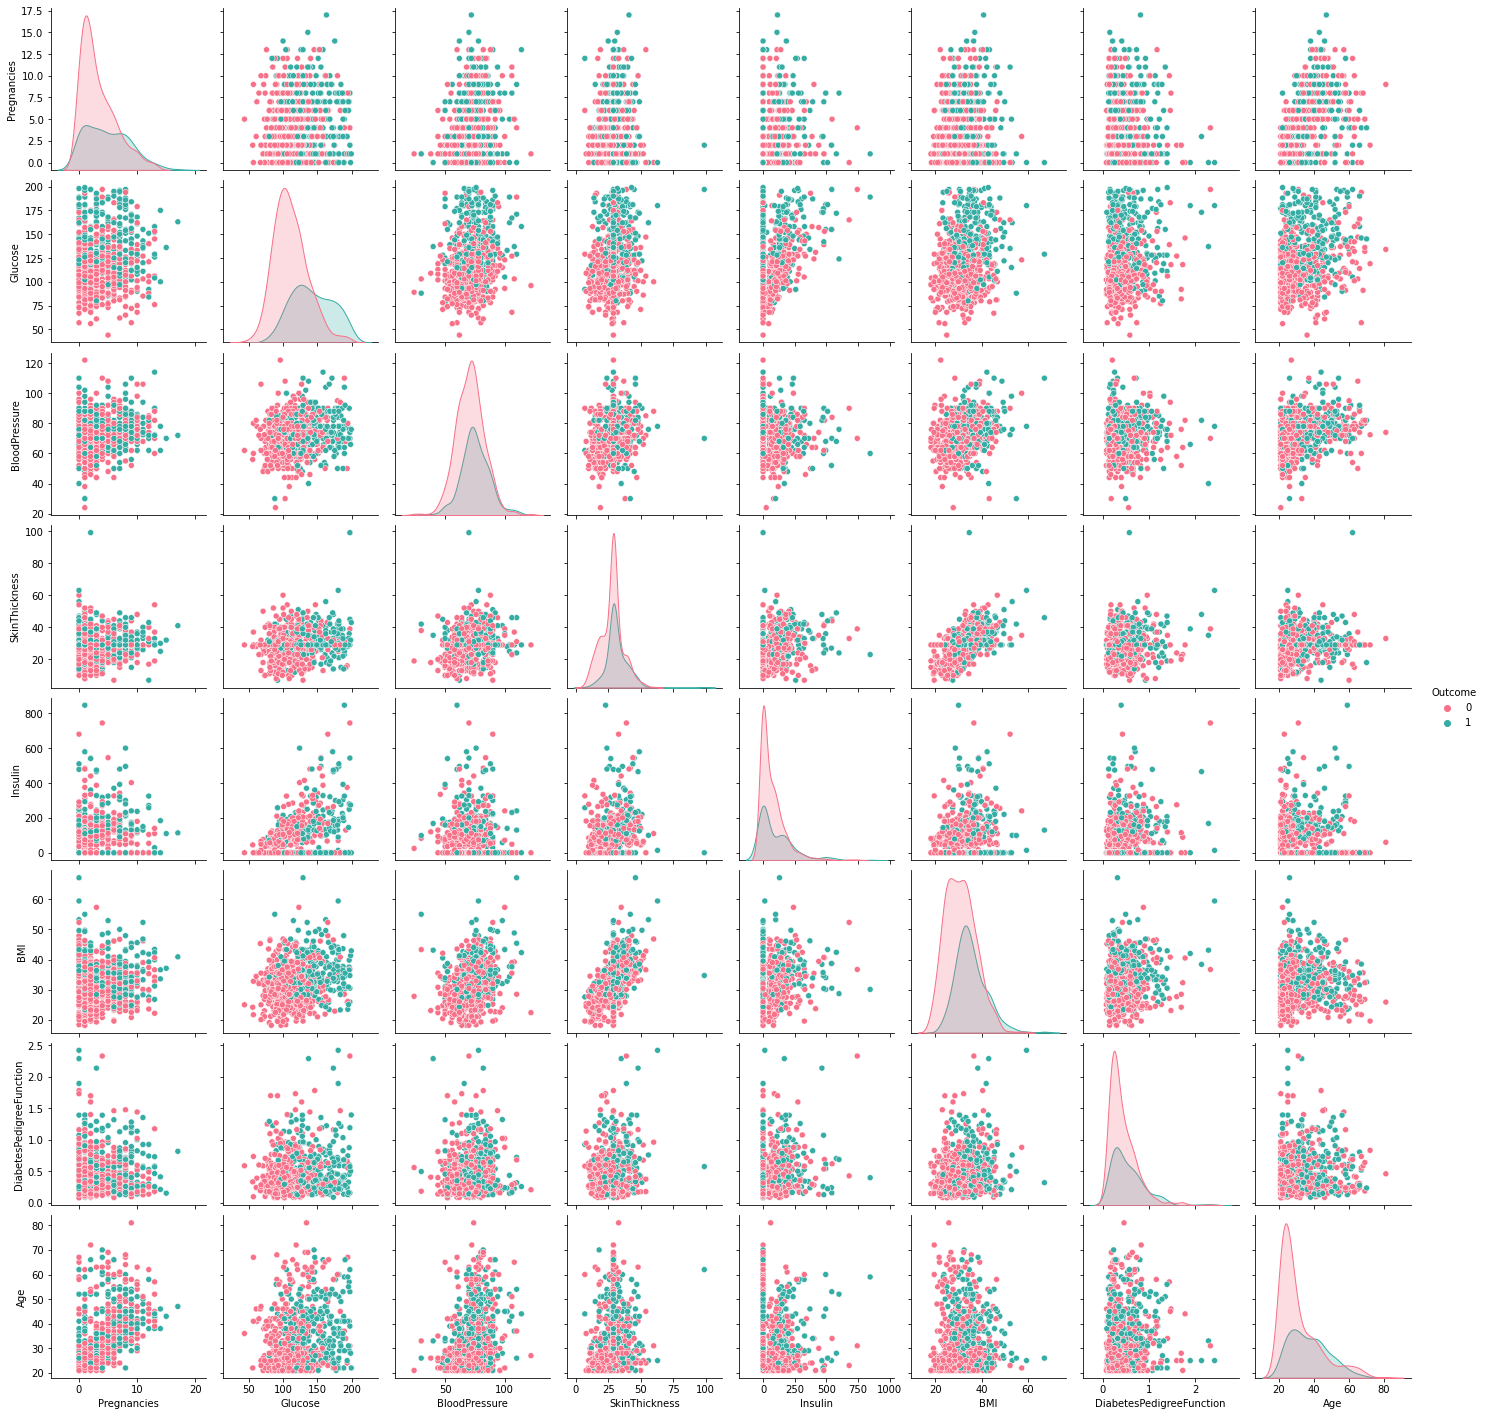

In [16]:
sns.pairplot(df, hue="Outcome",palette="husl")

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

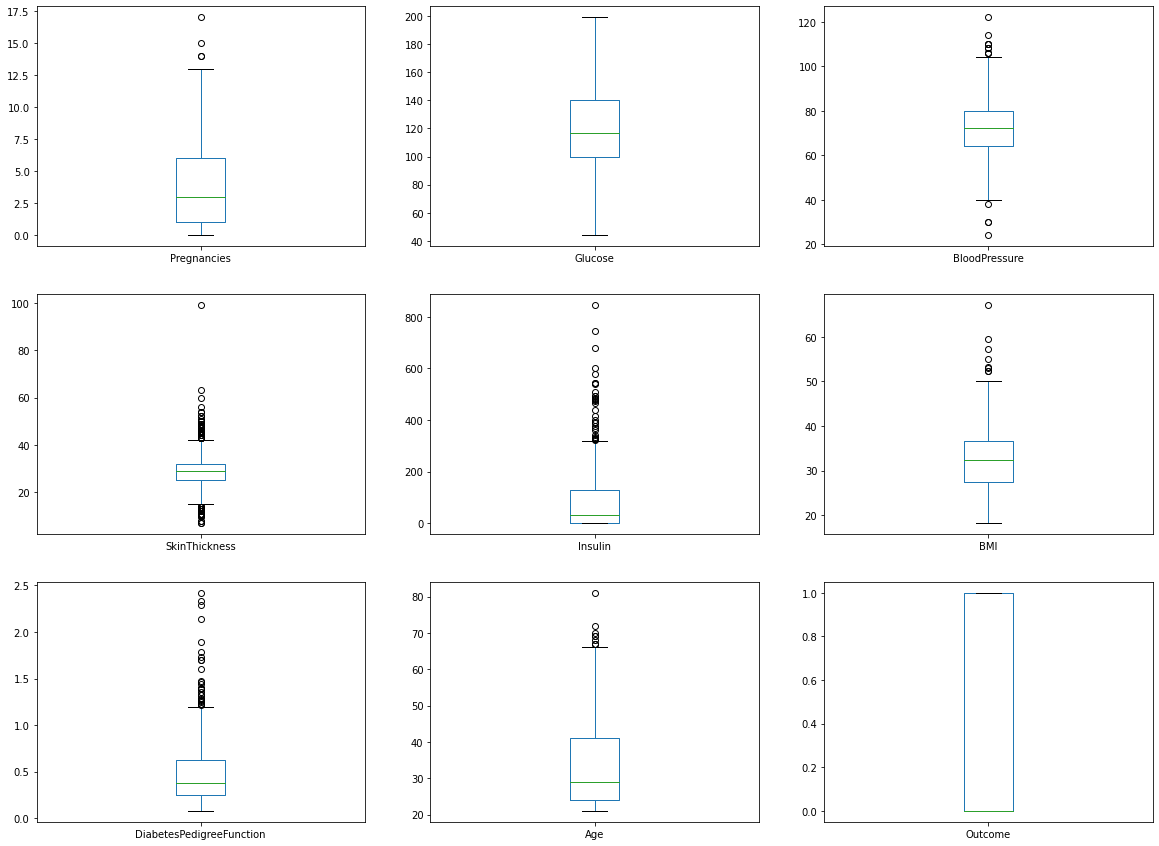

In [17]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

# Implementation of Logistic Regression

In [195]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [196]:
def loss(y,y_hat):
    return -np.mean(y*(np.log(y_hat))-(1-y)*np.log(1-y_hat))

In [197]:
def gradients(x,y,y_hat):
    m=x.shape[0]
    d_thetas=(1/m)*np.dot(x.T,(y_hat-y))
    d_intercept=(1/m)*np.sum((y_hat-y))
    return d_thetas,d_intercept

In [198]:
def train(x,y,alpha,max_iters):
    m,n=x.shape
    thetas=np.zeros((n,1))
    b=0
    y=y.reshape(m,1)
    loss_list=[]
    for _ in range(max_iters):
        z=np.dot(x,thetas)+b
        y_hat=sigmoid(z)
        d_thetas,d_b=gradients(x,y,y_hat)
        thetas-=alpha*d_thetas
        b-=alpha*d_b
        l=loss(y,sigmoid(np.dot(x,thetas)+b))
        loss_list.append(l)
    return thetas,b,loss_list

In [199]:
def predict(x,thetas,b,threshold):
    predictions=sigmoid(np.dot(x,thetas)+b)
    predic_class=[]
    predic_class=[1 if i > threshold else 0 for i in predictions]
    return np.array(predic_class)

In [200]:
def score(y,y_hat):
    acc=np.sum(y==y_hat)/len(y)
    return acc

In [201]:
x=df[['BMI', 'Glucose', 'Pregnancies', 'DiabetesPedigreeFunction']]
y=np.array(df.Outcome)

In [202]:
x_norm=(x-x.mean())/x.std()

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, random_state=0)

In [204]:
thetas,b,losses=train(x_train,y_train,0.1,1000)

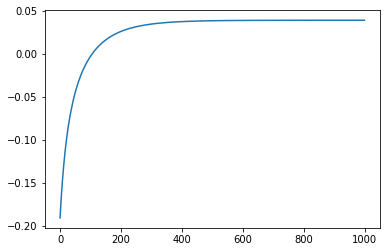

In [205]:
plt.plot(losses)
plt.show()

In [206]:
print('Accuracy of the Training set :')
score(y_train,predict(x_train,thetas,b,0.5))

Accuracy of the Training set :


0.765625

In [207]:
print('Accuracy of the Testing set :')
score(y_test,predict(x_test,thetas,b,0.5))

Accuracy of the Testing set :


0.796875

# Using sklearn

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression(solver='liblinear',max_iter=1000)

In [209]:
model=model.fit(x_train,y_train)

In [210]:
print('Accuracy of the Training set :')
accuracy_score(y_train,model.predict(x_train))

Accuracy of the Training set :


0.765625

In [211]:
print('Confusion matrix of the trainig set :')
confusion_matrix(y_train,model.predict(x_train))

Confusion matrix of the trainig set :


array([[327,  43],
       [ 92, 114]])

<AxesSubplot:>

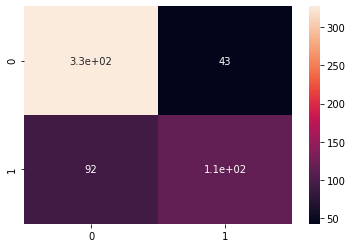

In [212]:
sns.heatmap(confusion_matrix(y_train,model.predict(x_train)), annot=True)

In [213]:
print("Classification Report of the trainig set :")
print(classification_report(y_train,model.predict(x_train)))

Classification Report of the trainig set :
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       370
           1       0.73      0.55      0.63       206

    accuracy                           0.77       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.76      0.77      0.76       576



In [214]:
print('Accuracy of the Testing set :')
accuracy_score(y_test,model.predict(x_test))

Accuracy of the Testing set :


0.796875

In [215]:
print('Confusion matrix of the Testing set :')
confusion_matrix(y_test,model.predict(x_test))

Confusion matrix of the Testing set :


array([[117,  13],
       [ 26,  36]])

<AxesSubplot:>

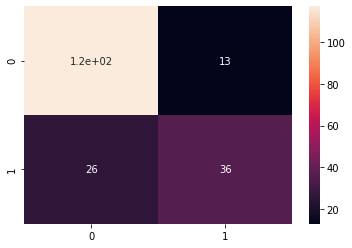

In [216]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)), annot=True)

In [217]:
print("Classification Report of the Testing set :")
print(classification_report(y_test,model.predict(x_test)))

Classification Report of the Testing set :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



(0.0, 1.0)

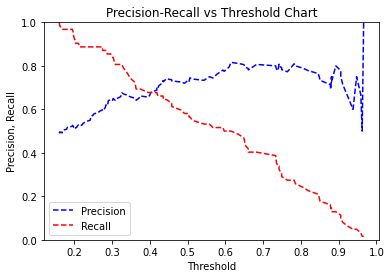

In [218]:
#Predict y_test values and probabilities based on fitted logistic regression model

y_predicted = model.predict(x_test) 
y_prob = model.predict_proba(x_test) 

# y_prob is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:, 1]) 

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

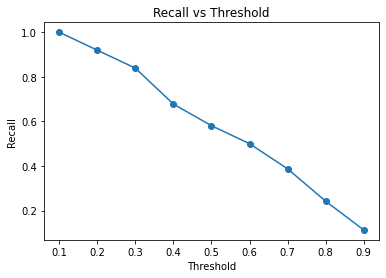

In [219]:
thresholds = np.linspace(0.1, 0.9, 9)
recall_scores = []

for threshold in thresholds:
    decisions = (model.predict_proba(x_test) >= threshold).astype(int)[:,1]
    recall_scores.append(recall_score(y_test, decisions))

plt.plot(thresholds, recall_scores, '-o')
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold")
plt.show()

In [220]:
# predict probabilities
y_probs = model.predict_proba(x_test)
# keep probabilities for being labeled as 1
probs = y_probs[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, (probs >=threshold).astype('int')) for threshold in thresholds]
# get best threshold
max_ind = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[max_ind], scores[max_ind]))

Threshold=0.290, F-Score=0.73611


# using just two features

In [221]:
x=df[['BMI', 'Glucose']]
y=np.array(df.Outcome)

In [222]:
x_norm=(x-x.mean())/x.std()

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, random_state=0)

In [224]:
thetas,b,losses=train(x_train,y_train,0.1,1000)

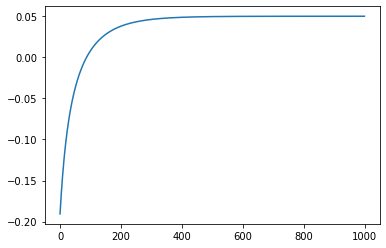

In [225]:
plt.plot(losses)
plt.show()

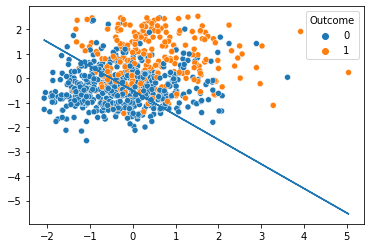

In [226]:
sns.scatterplot(x=np.array(x_norm)[:,0],y=np.array(x_norm)[:,1],hue='Outcome',data=df)
decision_boundary=-(thetas[0]+thetas[1]*np.array(x_norm)[:,0])/thetas[1]
plt.plot(np.array(x_norm)[:,0],decision_boundary)

In [227]:
print('Accuracy of the Training set :')
score(y_train,predict(x_train,thetas,b,0.5))

Accuracy of the Training set :


0.7638888888888888

In [228]:
print('Accuracy of the Testing set :')
score(y_test,predict(x_test,thetas,b,0.5))

Accuracy of the Testing set :


0.7760416666666666

# Using sklearn

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression(solver='liblinear',max_iter=1000)

In [230]:
model=model.fit(x_train,y_train)

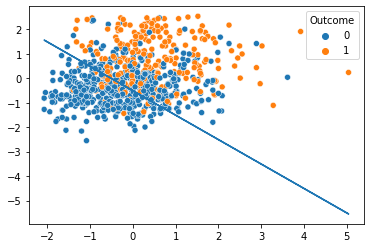

In [231]:
sns.scatterplot(x=np.array(x_norm)[:,0],y=np.array(x_norm)[:,1],hue='Outcome',data=df)
decision_boundary=-(model.coef_[0,0]+model.coef_[0,1]*(np.array(x_norm)[:,0]))/model.coef_[0,1]
plt.plot(np.array(x_norm)[:,0],decision_boundary)

In [232]:
print('Accuracy of the Training set :')
accuracy_score(y_train,model.predict(x_train))

Accuracy of the Training set :


0.7638888888888888

In [235]:
print('Accuracy of the Testing set :')
score(y_test,model.predict(x_test))

Accuracy of the Testing set :


0.7760416666666666

In [236]:
print('Confusion matrix of the Training set :')
confusion_matrix(y_train,model.predict(x_train))

Confusion matrix of the Training set :


array([[327,  43],
       [ 93, 113]])

<AxesSubplot:>

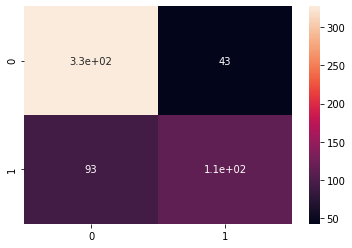

In [237]:
sns.heatmap(confusion_matrix(y_train,model.predict(x_train)), annot=True)

In [238]:
print("Classification Report of the trainig set :")
print(classification_report(y_train,model.predict(x_train)))

Classification Report of the trainig set :
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       370
           1       0.72      0.55      0.62       206

    accuracy                           0.76       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.76      0.76      0.76       576



In [239]:
print('Accuracy of the Testing set :')
accuracy_score(y_test,model.predict(x_test))

Accuracy of the Testing set :


0.7760416666666666

In [240]:
print('Confusion matrix of the Testing set :')
confusion_matrix(y_test,model.predict(x_test))

Confusion matrix of the Testing set :


array([[116,  14],
       [ 29,  33]])

<AxesSubplot:>

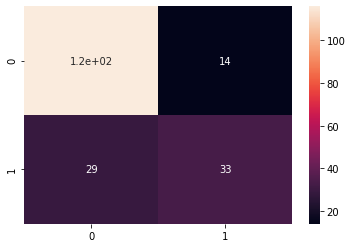

In [241]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)), annot=True)

In [242]:
print("Classification Report of the Testing set :")
print(classification_report(y_test,model.predict(x_test)))

Classification Report of the Testing set :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       130
           1       0.70      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

